<a href="https://colab.research.google.com/github/JamKia/macro2-projects/blob/main/Maro2_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I downloaded the data from FED website as below:

>  **Consumption**: Real Personal Consumption Expenditures, Billions of Chained 2012 Dollars, Quarterly, Seasonally Adjusted Annual Rate [here](https://fred.stlouisfed.org/series/PCECC96) (from 1947-01-01)

> **Labors Work Hours**: Hours Worked FRED Nonfarm Business Sector: Hours Worked for All Employed Persons, Percent Change from Quarter One Year Ago, Quarterly, Seasonally Adjusted [here](https://fred.stlouisfed.org/series/PRS85006032) (from 1947-01-01)

> **Investment**: FRED Real Gross Private Domestic Investment, Billions of chained 2012 Dollars, Quarterly, Seasonally Adjusted Annual Rate [here](https://fred.stlouisfed.org/series/GPDIC1) (from 1947-01-01)

> **Labor Productivity**: Labor Productivity FRED Nonfarm Business Sector: Labor Productivity (Output per Hour) for All Employed Persons, Percent Change at Annual Rate, Quarterly, Seasonally Adjusted [here](https://fred.stlouisfed.org/series/OPHNFB) (from 1947-01-01)

> **Real Interest Rate**: Real Interest Rate World Bank Adjusted for inflation by GDP deflator [here](https://data.worldbank.org/indicator/NY.GDP.DEFL.KD.ZG) (from 1961)

> **TFP (Total Factor Productivity)**: TFP (Total Factor Productivity) at Constant National Prices for United States, Index 2017=1, Annual, Not Seasonally Adjusted [here](https://fred.stlouisfed.org/series/RTFPNAUSA632NRUG)
(from 1954-01-01)
> **Wages**: 

> **GDP**: Real GDP (Billions of chained 2012 dollars] Seasonally adjusted at annual rates [here](https://fred.stlouisfed.org/series/GDPCA) (from 1947-01-01)


In [ ]:
pip install pynare

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.5 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 115 kB 22.4 MB/s 
     |████████████████████████████████| 110 kB 55.8 MB/s 
  Attempting uninstall: dill
    Found existing installation: dill 0.3.5.1
    Uninstalling dill-0.3.5.1:
      Successfully uninstalled dill-0.3.5.1


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
# gc = gspread.authorize(GoogleCredentials.get_application_default())

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls

Mounted at /content/drive
drive  sample_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import random
from scipy.stats import bootstrap, pearsonr, spearmanr, kendalltau, ks_2samp, ttest_ind
from tqdm.notebook import trange, tqdm
import statsmodels.api as sm

# Q1

In [ ]:
# input data
address_to_load = '/content/drive/My Drive/Macro II/project/'
filename_list = [
                 'TFP_1961',
                 'GDP_1961',
                 'consumption_1961',
                #  'real_interest_rate_1961',
                 'work_hours_1961',
                 'investment_1961',
                 'labor_productivity_1961',
                 # 'work_hours_1961'
                #  'real_wage_1979'
                 ]
#  comment:
# The index for 'real_interest_rate_1961' is not in the same format as the others.
# Hence, I put the others alogside each other and will make the formats the same.
# The index for some are annually and for some other is quarterly.
# Hence I put them alonside each other based on the intersections of the time.
frame = []
for name in filename_list:
  frame += [pd.read_excel(address_to_load + name +'.xlsx').set_index('date')]

real_wage = pd.read_excel(address_to_load + 'real_wage_1979' +'.xlsx').set_index('date')
real_wage['date'] = real_wage.index.year
frame += [real_wage]

# hours = pd.read_excel(address_to_load + 'hours' +'.xlsx').set_index('date')
# hours['date'] = hours.index.year
# frame += [hours]

df = pd.concat(frame, axis =1)
# msno.matrix(df)
# print(df)
df.dropna(how= 'any', axis=0, inplace = True)
df['date'] = df.index.year
df = df.set_index('date')
# print(df)
# msno.matrix(df)
# For now, since the indexing for "real_interest_rate_1961" is different,
# I have already make the concatenation with "real_interest_rate_1961" in the same manner.
# And, as below, I put them along each other based on the time  index.
df = pd.concat([ df,
                pd.read_excel(address_to_load + 'real_interest_rate_1961' +'.xlsx').set_index('date'),
                # pd.read_excel(address_to_load + 'real_wage_1979' +'.xlsx').set_index('date'),
                 ],
                axis =1).dropna()
# The only variable that has values for 2020 and 2021 is "real_interest_rate_1961", 
# so I drop those dates.
df.dropna(how = 'any', axis = 0, inplace= True)
# display(df.index)
df = df.iloc[0:-1]
df = df[['GDP', 'consumption', 'investment', 'work_hours', 'labor_productivity', 'real_wage', 'TFP', 'real_interest_rate']]
df

,GDP,consumption,investment,work_hours,labor_productivity,real_wage,TFP,real_interest_rate
date,,,,,,,,
1979,6780.924,4243.173,973.754,2.9,51.972,335.0,0.800099,8.296557
1980,6763.514,4286.200,933.101,-1.0,52.004,321.0,0.786021,9.033077
1981,6935.153,4307.237,952.418,2.3,53.009,314.0,0.790962,9.462145
1982,6810.120,4329.533,842.429,-6.7,52.041,312.0,0.775928,6.178267
1983,7122.290,4492.395,796.266,2.5,53.260,315.0,0.791454,3.916787
1984,7637.704,4779.767,1108.328,7.9,55.151,313.0,0.808835,3.607705
1985,7956.170,5029.959,1122.331,3.2,55.965,314.0,0.815546,3.162445
1986,8231.664,5229.041,1175.105,-0.6,57.771,321.0,0.824341,2.013901
1987,8516.418,5417.904,1157.306,5.1,58.084,328.0,0.824635,2.472810


In [ ]:
def apply_log(data):
  for i in range(0, len(data)):
    if data.iloc[i] > 0:
      data.iloc[i] = np.log( data.iloc[i])
    if data.iloc[i] < 0:
      data.iloc[i] = - np.log( abs(data.iloc[i]))

df.apply(apply_log)
df
# msno.matrix(df)

,GDP,consumption,investment,work_hours,labor_productivity,real_wage,TFP,real_interest_rate
date,,,,,,,,
1979,8.821869,8.353067,6.881159,1.064711,3.950705,5.814131,1.500497,2.115841
1980,8.819298,8.363156,6.838513,-0.000000,3.951321,5.771441,1.423905,2.200893
1981,8.844358,8.368052,6.859004,0.832909,3.970462,5.749393,1.450279,2.247299
1982,8.826165,8.373215,6.736289,-1.902108,3.952032,5.743003,1.371622,1.821038
1983,8.870985,8.410141,6.679933,0.916291,3.975186,5.752573,1.452933,1.365272
1984,8.940852,8.472147,7.010608,2.066863,4.010075,5.746203,1.550412,1.283072
1985,8.981703,8.523167,7.023163,1.163151,4.024726,5.749393,1.590140,1.151346
1986,9.015743,8.561983,7.069113,0.510826,4.056487,5.771441,1.644178,0.700074
1987,9.049751,8.597464,7.053850,1.629241,4.061890,5.793014,1.646028,0.905355


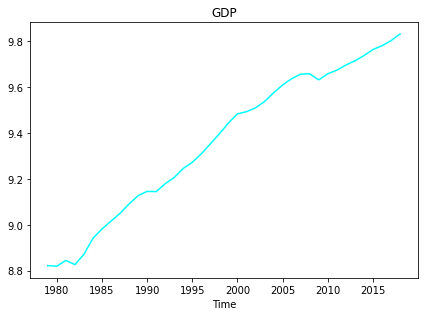

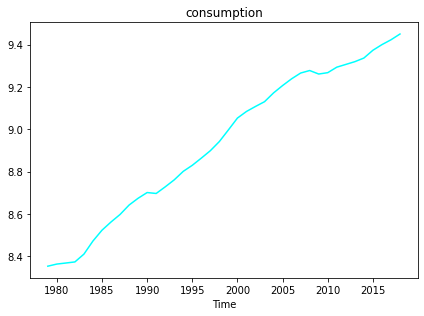

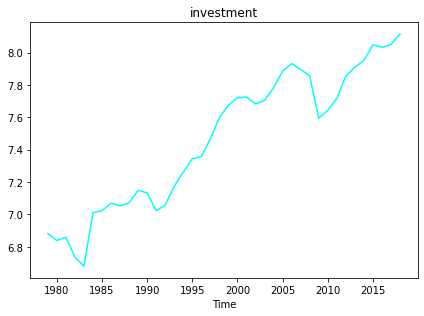

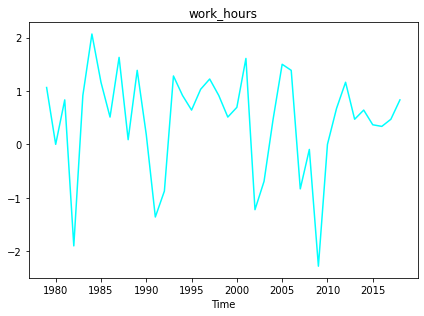

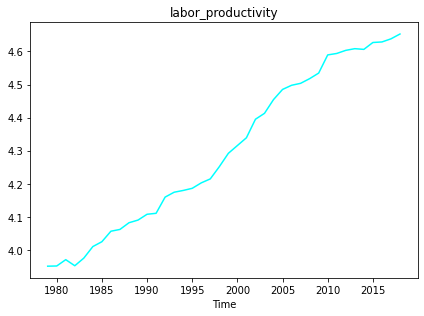

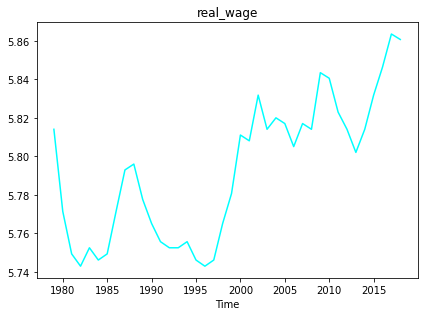

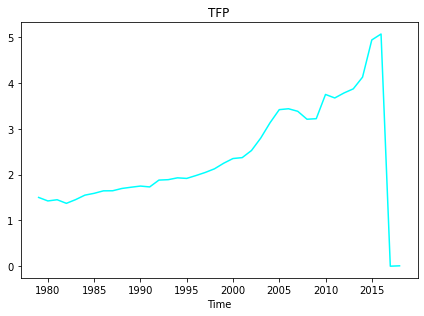

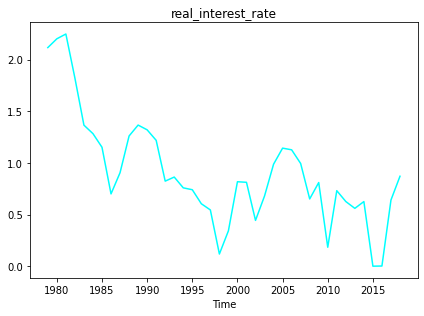

In [ ]:
# plot
for name in df.columns:
  fig, ax = plt.subplots(1, 1,
              figsize =(6, 4.5),
              tight_layout = True)
  ax.plot(df[name],
          color = 'cyan',
          )
  plt.title(name)
  plt.xlabel('Time')
  plt.savefig(address_to_load + name + '.jpg')
  plt.show()

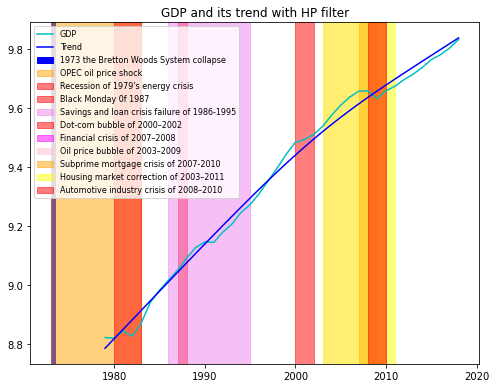

<Figure size 432x288 with 0 Axes>

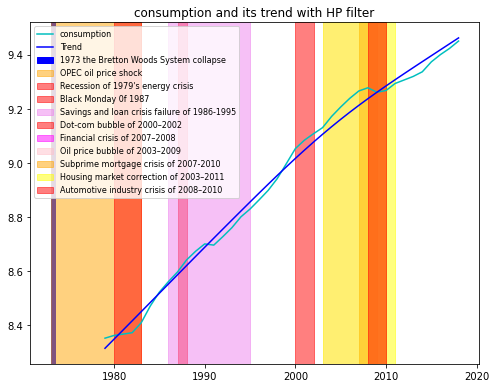

<Figure size 432x288 with 0 Axes>

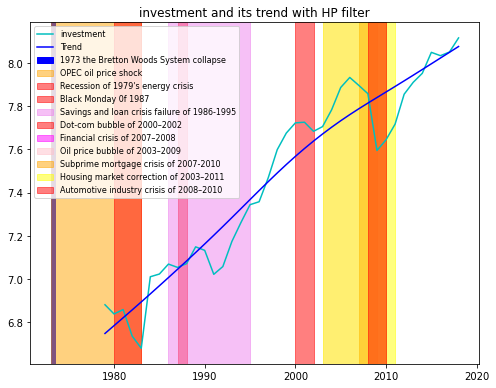

<Figure size 432x288 with 0 Axes>

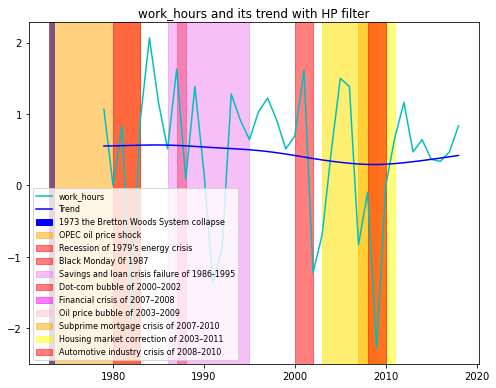

<Figure size 432x288 with 0 Axes>

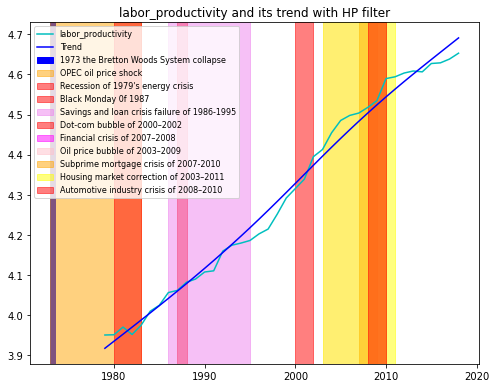

<Figure size 432x288 with 0 Axes>

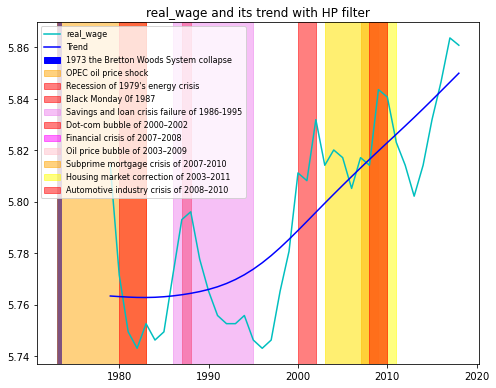

<Figure size 432x288 with 0 Axes>

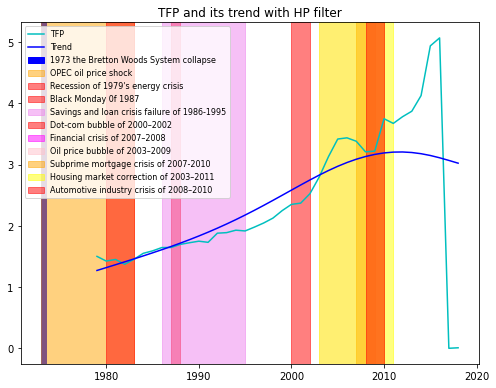

<Figure size 432x288 with 0 Axes>

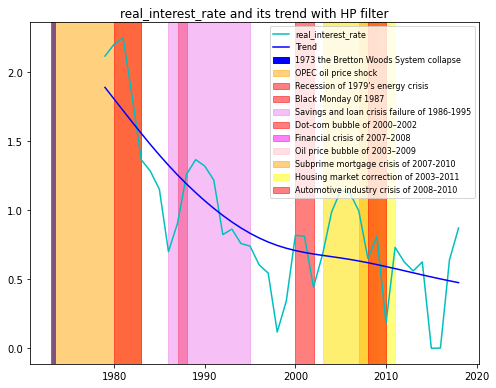

<Figure size 432x288 with 0 Axes>

In [ ]:
# The Hodrick-Prescott (HP) filter refers to a data-smoothing technique.
# The HP filter is commonly applied during analysis to remove short-term 
# fluctuations associated with the business cycle.
# Removal of these short-term fluctuations reveals long-term trends.
# hpfilter: https://www.statsmodels.org/dev/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html

for variable in df.columns:
  cycle, trend = sm.tsa.filters.hpfilter(df[variable], 1600)
  HP_filter_df = pd.DataFrame(df[variable].values, columns = [variable], index = df.index)
  HP_filter_df['cycle'] = pd.Series(cycle)
  HP_filter_df['trend'] = trend
  #plot hpfilter
  figsize = (7,5.5)
  fig, ax = plt.subplots(figsize = figsize )
  ax.plot(HP_filter_df[variable], label = variable, color = 'c')
  ax.plot(HP_filter_df['trend'], label = 'Trend', color = 'b')

  ax.axvspan(1973, 1973.5, alpha=1, color='b', label = '1973 the Bretton Woods System collapse')
  ax.axvspan(1973, 1983, alpha=0.5, color='orange', label = 'OPEC oil price shock')
  ax.axvspan(1980, 1983, alpha=0.5, color='red', label = "Recession of 1979's energy crisis ")
  ax.axvspan(1987, 1988, alpha=0.5, color='red', label = 'Black Monday 0f 1987')
  ax.axvspan(1986, 1995, alpha=0.5, color='violet', label = 'Savings and loan crisis failure of 1986-1995')
  ax.axvspan(2000, 2002, alpha=0.5, color='red', label = 'Dot-com bubble of 2000–2002')
  ax.axvspan(2007, 2008, alpha=0.5, color='magenta', label = 'Financial crisis of 2007–2008')
  ax.axvspan(2003, 2009, alpha=0.5, color='pink', label = 'Oil price bubble of 2003–2009')
  ax.axvspan(2007, 2010, alpha=0.5, color='orange', label = 'Subprime mortgage crisis of 2007-2010')
  ax.axvspan(2003, 2011, alpha=0.5, color='yellow', label = 'Housing market correction of 2003–2011')
  ax.axvspan(2008, 2010, alpha=0.5, color='red', label = 'Automotive industry crisis of 2008–2010')

  plt.title(variable +' and its trend with HP filter')
  plt.legend(fontsize = 8)
  plt.tight_layout()
  plt.show()
  plt.savefig(address_to_load + variable + '.jpg')

In [ ]:
# the standard deviation of all time-series
df.std()

GDP                   0.322640
consumption           0.352716
investment            0.427034
work_hours            0.975042
labor_productivity    0.241340
real_wage             0.036524
TFP                   1.143035
real_interest_rate    0.532663
dtype: float64

In [ ]:
# the ration of all standard deviations against GDP's standard deviation
df.std() / df.std()['GDP']

GDP                   1.000000
consumption           1.093220
investment            1.323562
work_hours            3.022075
labor_productivity    0.748018
real_wage             0.113204
TFP                   3.542757
real_interest_rate    1.650953
dtype: float64

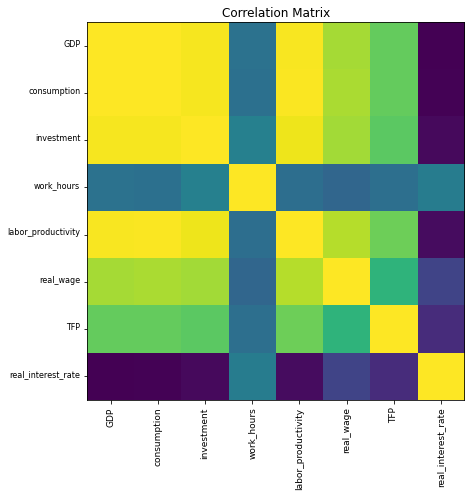

GDP                   1.000000
consumption           0.999345
investment            0.977337
work_hours           -0.073450
labor_productivity    0.985186
real_wage             0.765394
TFP                   0.590567
real_interest_rate   -0.722456
Name: GDP, dtype: float64

In [ ]:
# the correlation coefficents with GDP
figsize = (7,7)
fig, ax = plt.subplots(figsize = figsize )
ax.imshow( df.corr() )
ax.yaxis.set(ticks= np.arange(0, len(df.corr().columns)), ticklabels= df.corr().columns)
ax.set_yticklabels(df.columns, rotation=0, ha='right', va = 'baseline',
                  minor=False,
                  fontsize= 8)
ax.xaxis.set(ticks=np.arange(0, len(df.corr().columns)), ticklabels= df.corr().columns)
ax.set_xticklabels(df.corr().columns, rotation=90, ha='center', va = 'top',
                  minor=False,
                  fontsize= 9)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
df.corr()['GDP']

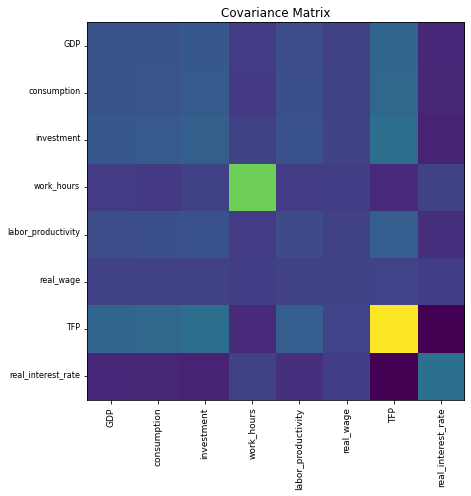

GDP                   0.104097
consumption           0.113726
investment            0.134656
work_hours           -0.023107
labor_productivity    0.076713
real_wage             0.009020
TFP                   0.217794
real_interest_rate   -0.124160
Name: GDP, dtype: float64

In [ ]:
figsize = (7,7)
fig, ax = plt.subplots(figsize = figsize )
ax.imshow( df.cov() )
ax.yaxis.set(ticks= np.arange(0, len(df.cov().columns)), ticklabels= df.cov().columns)
ax.set_yticklabels(df.cov().columns, rotation=0, ha='right', va = 'baseline',
                  minor=False,
                  fontsize= 8)
ax.xaxis.set(ticks=np.arange(0, len(df.cov().columns)), ticklabels= df.cov().columns)
ax.set_xticklabels(df.cov().columns, rotation=90, ha='center', va = 'top',
                  minor=False,
                  fontsize= 9)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()
df.cov()['GDP']

In [ ]:
for c in df.columns:
  print(c, np.round( sm.tsa.acf(df[c])[1], 3))

GDP 0.932
consumption 0.933
investment 0.921
work_hours 0.143
labor_productivity 0.941
real_wage 0.862
TFP 0.67
real_interest_rate 0.776


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


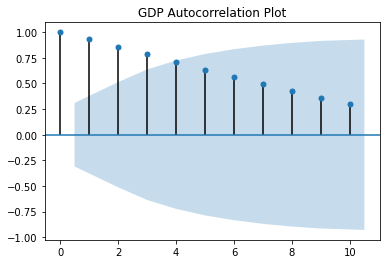

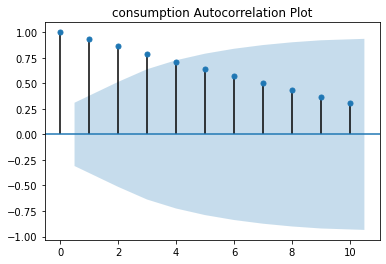

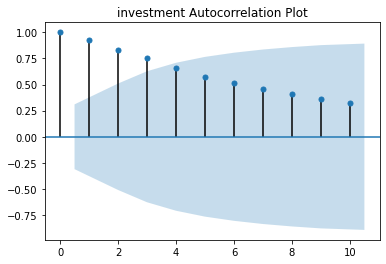

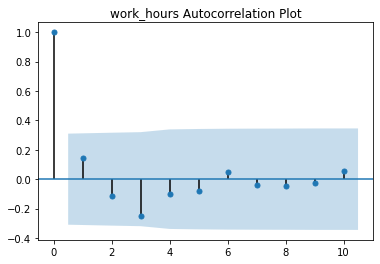

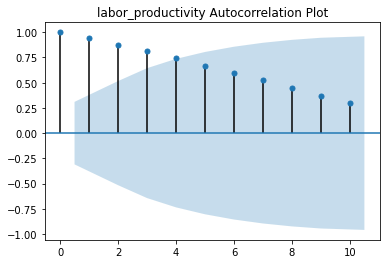

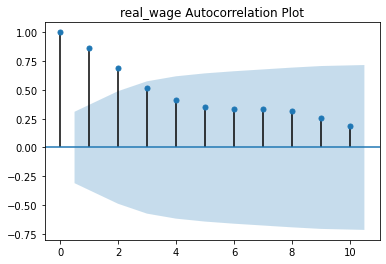

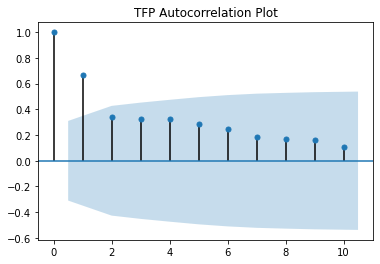

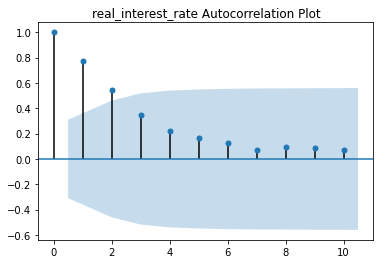

In [ ]:
import statsmodels
for c in df.columns:
  statsmodels.graphics.tsaplots.plot_acf(df[c], lags=10)
  plt.title(c+' Autocorrelation Plot')

  # print('Autocorrelation for '+c+' is:\n', sm.tsa.acf(df[c]))
  # print('Autocorrelation for '+c+' at p=1 is:\n', sm.tsa.acf(df[c], nlags = 1))
  # print('Autocorrelation for '+c+' at p=1 is:\n', np.round( sm.tsa.acf(df[c])[1], 3) )


In [ ]:
np.round( df.cov() ,  3).to_excel(address_to_load + 'variance_covariance.xlsx')

Corr( x_t, y_{t-4} ):
                          GDP  consumption  investment  work_hours  \
GDP                 1.000000     0.999345    0.977337   -0.073450   
consumption         0.999345     1.000000    0.974329   -0.089767   
investment          0.977337     0.974329    1.000000    0.024980   
work_hours         -0.073450    -0.089767    0.024980    1.000000   
labor_productivity  0.985186     0.988807    0.953140   -0.101036   
real_wage           0.765394     0.778736    0.761695   -0.156497   
TFP                 0.590567     0.594156    0.565581   -0.095185   
real_interest_rate -0.722456    -0.710244   -0.681956    0.004170   
GDP_lag4            0.991507     0.993494    0.939749   -0.246930   

                    labor_productivity  real_wage       TFP  \
GDP                           0.985186   0.765394  0.590567   
consumption                   0.988807   0.778736  0.594156   
investment                    0.953140   0.761695  0.565581   
work_hours                   -0.10

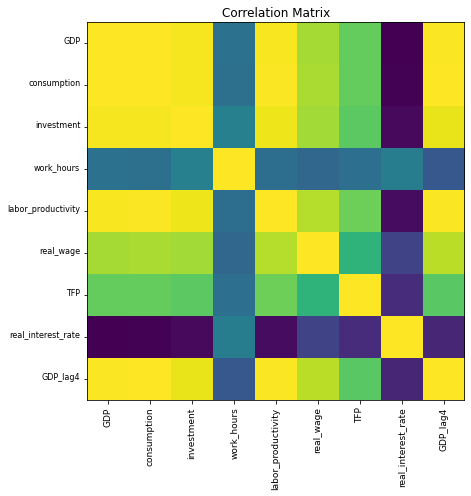

Corr( x_t, y_{t+4} ):
                          GDP  consumption  investment  work_hours  \
GDP                 1.000000     0.999345    0.977337   -0.073450   
consumption         0.999345     1.000000    0.974329   -0.089767   
investment          0.977337     0.974329    1.000000    0.024980   
work_hours         -0.073450    -0.089767    0.024980    1.000000   
labor_productivity  0.985186     0.988807    0.953140   -0.101036   
real_wage           0.765394     0.778736    0.761695   -0.156497   
TFP                 0.590567     0.594156    0.565581   -0.095185   
real_interest_rate -0.722456    -0.710244   -0.681956    0.004170   
GDP_lead4           0.991507     0.989510    0.953099   -0.107991   

                    labor_productivity  real_wage       TFP  \
GDP                           0.985186   0.765394  0.590567   
consumption                   0.988807   0.778736  0.594156   
investment                    0.953140   0.761695  0.565581   
work_hours                   -0.10

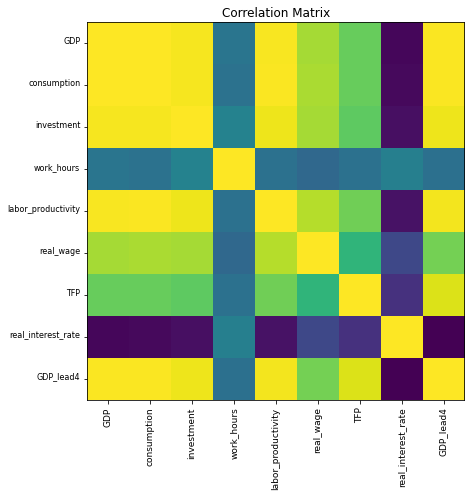

In [ ]:
df_lag = df.copy()
df_lead = df.copy()
df_lag['GDP_lag4'] = df['GDP'].shift(4)
df_lead['GDP_lead4'] = df['GDP'].shift(-4)
# df_lag = df.drop('GDP_lead4', axis =1).dropna()
# df_lead = df.drop('GDP_lag4', axis =1).dropna()

print( 'Corr( x_t, y_{t-4} ):\n', df_lag.corr() )
fifsize = (4,4)
fig, ax = plt.subplots(figsize = figsize )
ax.imshow(df_lag.corr())
ax.yaxis.set(ticks= np.arange(0, len(df_lag.corr())), ticklabels= df_lag.corr().columns)
ax.set_yticklabels(df_lag.corr().columns, rotation=0, ha='right', va = 'baseline',
                  minor=False,
                  fontsize= 8)
ax.xaxis.set(ticks=np.arange(0, len(df_lag.corr())), ticklabels= df_lag.corr().columns)
ax.set_xticklabels(df_lag.corr().columns, rotation=90, ha='center', va = 'top',
                  minor=False,
                  fontsize= 9)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print( 'Corr( x_t, y_{t+4} ):\n', df_lead.corr() )
fifsize = (4,4)
fig, ax = plt.subplots(figsize = figsize )
ax.imshow(df_lead.corr())
ax.yaxis.set(ticks= np.arange(0, len(df_lead.corr())), ticklabels= df_lead.corr().columns)
ax.set_yticklabels(df_lead.corr().columns, rotation=0, ha='right', va = 'baseline',
                  minor=False,
                  fontsize= 8)
ax.xaxis.set(ticks=np.arange(0, len(df_lead.corr())), ticklabels= df_lead.corr().columns)
ax.set_xticklabels(df_lead.corr().columns, rotation=90, ha='center', va = 'top',
                  minor=False,
                  fontsize= 9)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#Q2

In [ ]:
# input data
address_to_load = '/content/drive/My Drive/Macro II/project/'
df_Q2 = pd.read_csv(address_to_load + 'wana.csv')
print(df_Q2)

         STORE          UPC  WEEK  MOVE  QTY  PRICE SALE  PROFIT  OK  \
0           76   1192603016   306     0    1   0.00  NaN    0.00   1   
1           76   1192603016   307     1    1   2.99  NaN   35.61   1   
2           76   1192603016   308     0    1   0.00  NaN    0.00   1   
3           76   1192603016   309     0    1   0.00  NaN    0.00   1   
4           76   1192603016   310     0    1   0.00  NaN    0.00   1   
...        ...          ...   ...   ...  ...    ...  ...     ...  ..   
7339212    144  78765150152   395     0    1   0.00  NaN    0.00   1   
7339213    144  78765150152   396     0    1   0.00  NaN    0.00   1   
7339214    144  78765150152   397     0    1   0.00  NaN    0.00   1   
7339215    144  78765150152   398     0    1   0.00  NaN    0.00   1   
7339216    144  78765150152   399     0    1   0.00  NaN    0.00   1   

                PRICE_HEX        PROFIT_HEX  
0        0000000000000000  0000000000000000  
1        4007EB851EB851EC  4041CE147AE147AE

In [ ]:
unique_stores = np.unique(df_Q2['STORE'].values)
print('Unique Stores:\n',unique_stores)

Unique Stores:
 [  2   5   8   9  12  14  18  21  28  32  33  40  44  45  47  48  49  50
  51  52  53  54  56  59  62  64  67  68  70  71  72  73  74  75  76  77
  78  80  81  83  84  86  88  89  90  91  92  93  94  95  97  98 100 101
 102 103 104 105 106 107 109 110 111 112 113 114 115 116 117 118 119 121
 122 123 124 126 128 129 130 131 132 133 134 135 136 137 139 140 141 142
 143 144 146]


In [ ]:
# price change
frame = []
for store in tqdm(unique_stores):
  price_df = df_Q2[df_Q2['STORE'] == store ]['PRICE']
  price_df = price_df[price_df > 0]
  price_df = price_df.reset_index().drop('index', axis = 1)

  i_end = np.max(price_df.index)
  upward_change_counter = 0
  downward_change_counter = 0
  # print(list(price_df.index))
  for i in list(price_df.index):
    if i == i_end:
      break
    elif price_df.values[i+1][0] > price_df.values[i][0]: upward_change_counter += 1
    elif price_df.values[i+1][0] < price_df.values[i][0]: downward_change_counter += 1

  frame += [(store, upward_change_counter, downward_change_counter)]

df_price_stickiness = pd.DataFrame.from_records(frame, columns = ['store', 'upward_change_counter', 'downward_change_counter'])
df_price_stickiness


  0%|          | 0/93 [00:00<?, ?it/s]

,store,upward_change_counter,downward_change_counter
0,2,2299,1750
1,5,3319,2549
2,8,3452,2744
3,9,3222,2554
4,12,3887,2907
...,...,...,...
88,141,496,341
89,142,517,353
90,143,694,527
91,144,617,471


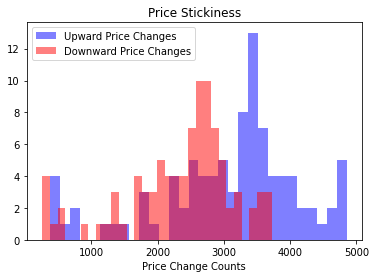

store                        38.600557
upward_change_counter      1065.768564
downward_change_counter     808.721275
dtype: float64 store                        87.268817
upward_change_counter      3071.387097
downward_change_counter    2349.752688
dtype: float64


In [ ]:
plt.hist(df_price_stickiness['upward_change_counter'], alpha = 0.5, color = 'b', bins = 30, label = 'Upward Price Changes')
plt.hist(df_price_stickiness['downward_change_counter'], alpha = 0.5, color = 'r', bins = 30, label = 'Downward Price Changes')
plt.title('Price Stickiness')
plt.xlabel('Price Change Counts')
plt.legend()
plt.show()
print(df_price_stickiness.std(), df_price_stickiness.mean())

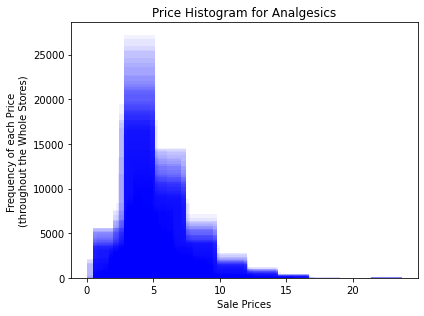

,store_no,whole sale qty,min,max,mean,std,kurtosis,skewness,0.25 quantile,0.5 quantile,0.75 quantile
0,2,22521,0.02,11.98,4.848241,1.850302,0.029257,0.610421,3.49,4.59,5.89
1,5,38360,0.47,23.69,5.260134,2.437945,2.877793,1.407768,3.58,4.63,6.29
2,8,39015,0.47,18.99,4.996399,2.129088,2.897900,1.317924,3.49,4.59,5.99
3,9,32852,0.47,15.49,5.178790,2.315951,2.491766,1.336809,3.59,4.69,6.19
4,12,45810,0.47,23.69,5.231016,2.492479,3.016531,1.448482,3.49,4.59,6.19
...,...,...,...,...,...,...,...,...,...,...,...
88,141,4309,1.79,15.49,6.171903,2.834692,1.153224,1.213700,3.99,5.49,7.59
89,142,4213,1.49,15.49,6.101286,2.777636,1.243126,1.232110,3.99,5.49,7.49
90,143,6922,1.64,15.49,6.119340,2.820114,1.078110,1.168820,3.99,5.49,7.59
91,144,5313,1.64,15.49,6.090425,2.825014,1.109467,1.189454,3.99,5.49,7.59


In [ ]:
30fig, ax = plt.subplots(1, 1,
        figsize =(6, 4.5),
        tight_layout = True)
frame = []
for store in unique_stores:
  price_df = df_Q2[df_Q2['STORE']== store]['PRICE']
  price_df = price_df[price_df > 0]
  #########
  plt.hist(price_df, alpha = 0.05, color = 'blue',
          label = 'Store '+str(store)+'s',
          # bins = np.arange(0,np.ceil(np.max(price_df)), int(np.max(price_df)/20))
          )
  #########
  frame += [(store, len(price_df),
            price_df.min(), price_df.max(),
            price_df.mean(), price_df.std(),
            price_df.kurt(), price_df.skew(), 
            price_df.quantile(0.25), price_df.quantile(0.5), price_df.quantile(0.75),
            )]
plt.xlabel('Sale Prices') # '+str(store)+"'s")
plt.ylabel('Frequency of each Price \n(throughout the Whole Stores)')
# plt.legend()
plt.title('Price Histogram for Analgesics')# Store '+str(store)+"'s")
plt.show()
results = pd.DataFrame.from_records(frame, columns = ['store_no','whole sale qty', 'min', 'max', 'mean', 'std', 'kurtosis', 'skewness', '0.25 quantile', '0.5 quantile', '0.75 quantile'])
results

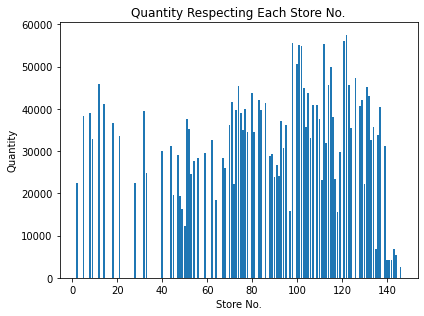

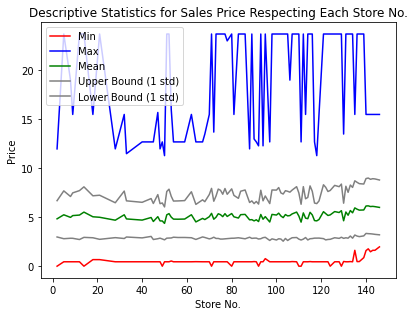

In [ ]:
fig, ax = plt.subplots(1, 1,
        figsize =(6, 4.5),
        tight_layout = True)
plt.bar(results['store_no'], results['whole sale qty'])
plt.title('Quantity Respecting Each Store No.')
plt.ylabel('Quantity')
plt.xlabel('Store No.')
plt.show()

fig, ax = plt.subplots(1, 1,
        figsize =(6, 4.5),
        tight_layout = True)
plt.plot(results['store_no'], results['min'], color = 'red', label = 'Min')
plt.plot(results['store_no'], results['max'], color = 'blue', label = 'Max')
plt.plot(results['store_no'], results['mean'], color = 'green', label = 'Mean')
plt.plot(results['store_no'], results['mean'] + results['std'], color = 'grey', label = 'Upper Bound (1 std)')
plt.plot(results['store_no'], results['mean'] - results['std'], color = 'grey', label = 'Lower Bound (1 std)')
plt.legend()
plt.title('Descriptive Statistics for Sales Price Respecting Each Store No.')
plt.ylabel('Price')
plt.xlabel('Store No.')
plt.show()